In [2492]:
#coding:utf-8
%reload_ext autoreload 
%autoreload 2
import os
import sys
project_basedir = '..'
sys.path.append(project_basedir)
from config import conf
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [2493]:
validate_dirs = os.listdir(conf.validate_dir)
validate_dirs = [i for i in validate_dirs if i != '_blank']
validate_dirs = sorted(validate_dirs)
validate_dirs = [os.path.join(conf.validate_dir,i) for i in validate_dirs]

In [2494]:
def add_score(onedic,key,point):
    onedic.setdefault(key,0)
    onedic[key] += point
def cal_points(gameplays):
    point_dic = {}
    for onegame in gameplays:
        if onegame[-3:] != 'cbf':
            continue
        winner = onegame.split('_')[-1].split('.')[0]
        player1 = onegame.split('_')[-2].split('-')[0]
        player2 = onegame.split('_')[-2].split('-')[1]
        assert(winner in ['w','b','peace'])
        if winner == 'w':
            add_score(point_dic,player1,1)
            add_score(point_dic,player2,0)
        elif winner == 'b':
            add_score(point_dic,player1,0)
            add_score(point_dic,player2,1)
        elif winner == 'peace':
            add_score(point_dic,player1,0.5)
            add_score(point_dic,player2,0.5)
            add_score(point_dic,'peace',1)
        else:
            raise
    return point_dic

In [2495]:
game_numbers = [0]
game_numbers_identity = [0]
elu_points = [0]
validate_games = [0]
win_rate = [0]
dates = ['start']
peace_rates = [0]
delta_elo = [0]
for one_dir in validate_dirs:
    one_date = one_dir.split('/')[-1]
    gameplays = os.listdir(one_dir)
    pointcdic = cal_points(gameplays)
    game_num = len(gameplays)
    
    try:
        gn = len(os.listdir(os.path.join(conf.history_selfplay_dir,one_date.replace('_noup',''))))
    except:
        gn = 0
    if game_num == 0:
        continue
        
    old_score = pointcdic.get('oldnet',0) / game_num
    peace_rate = pointcdic.get('peace',0) / game_num
    
    if old_score == 0:
        continue
        
    game_numbers.append(game_numbers[-1] + gn)
    game_numbers_identity.append(gn)
    
    
    elo = np.log10(1 / old_score - 1) * 400
    if one_date >= '2018-08-27_22-13-25' and one_date < '2018-09-16_17-00-24' and elo < 0:
        elo = 0
    #elif one_date >= '2018-09-16_17-00-24' and elo < -100:
    #    elo = 0
    elu_points.append(elu_points[-1] + elo)
    validate_games.append(len(gameplays))
    win_rate.append(1 - old_score)
    dates.append(one_date)
    peace_rates.append(peace_rate)
    delta_elo.append(elo)

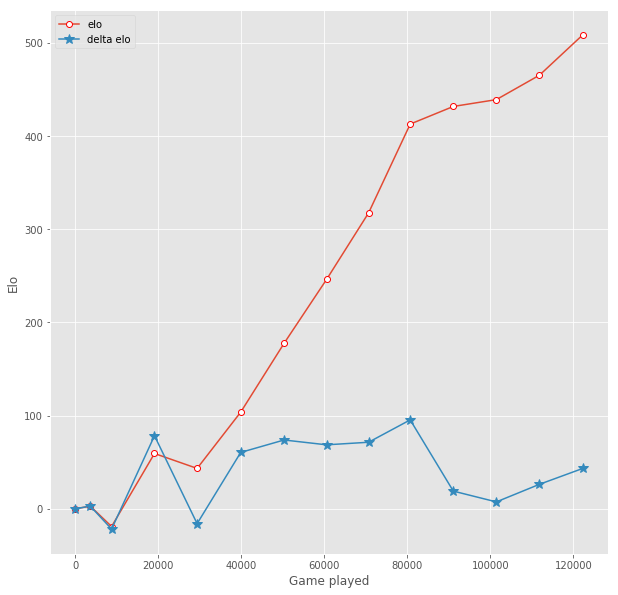

In [2496]:
plt.figure(figsize=(10,10))
plt.plot(game_numbers,elu_points,marker='o',mec='r',mfc='w',label='elo')
plt.plot(game_numbers,delta_elo,marker='*',ms=10,label='delta elo')
plt.legend()
plt.xlabel("Game played")
plt.ylabel("Elo")

In [2497]:
pd.DataFrame({
    'dates':dates,
    'game_numbers':game_numbers,
    'game_numbers_identity':game_numbers_identity,
    'elu_points':elu_points,
    'validate_games':validate_games,
    'win_rate':win_rate,
    'peace_rates':peace_rates,
    'delta_elo':delta_elo,
    '上位情况':[('pending' if i == 0 else "上位") for i in delta_elo]
})[-10:]

,dates,delta_elo,elu_points,game_numbers,game_numbers_identity,peace_rates,validate_games,win_rate,上位情况
4,2018-09-18_22-20-25_noup,-16.002065,43.277062,29323,10273,0.435146,239,0.476987,上位
5,2018-09-19_01-50-25_noup,60.455191,103.732253,39838,10515,0.365546,238,0.586134,上位
6,2018-09-19_04-50-25_noup,73.774415,177.506668,50278,10440,0.355649,239,0.604603,上位
7,2018-09-19_07-30-23_noup,68.598203,246.104871,60524,10246,0.372881,236,0.597458,上位
8,2018-09-19_10-30-25_noup,71.353222,317.458093,70643,10119,0.426160,237,0.601266,上位
9,2018-09-19_13-50-25_noup,95.361832,412.819925,80678,10035,0.456067,239,0.633891,上位
10,2018-09-19_18-10-25_noup,18.916841,431.736766,91062,10384,0.476987,239,0.527197,上位
11,2018-09-19_23-00-25_noup,7.330952,439.067718,101433,10371,0.447257,237,0.510549,上位
12,2018-09-20_03-40-25_noup,26.216340,465.284058,111824,10391,0.456067,239,0.537657,上位
13,2018-09-20_08-00-25_noup,43.237672,508.521730,122250,10426,0.476190,105,0.561905,上位


In [2498]:
!ls -l ../data/distributed/ | wc -l 

2848


In [2499]:
!ls -l ../data/distributed/ | grep peace | wc -l

160


In [2500]:
! date

2018年 09月 20日 星期四 09:24:49 CST


In [2501]:
list(range(1,2))

[1]